<a href="https://colab.research.google.com/github/pppseojun/data-collection/blob/main/exchange_data2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 국가별 환율 데이터

---



In [541]:
import requests
import pandas as pd
import json
from os import name
import xml.etree.ElementTree as et
import pandas as pd
import bs4
from lxml import html
from urllib.parse import urlencode, quote_plus, unquote

In [592]:
authKey = 'msaZvtLohKFNHcOyZFQrFV3ByvQWDman'
seachData = '20200117'
data='AP01'

url = 'https://www.koreaexim.go.kr/site/program/financial/exchangeJSON?authkey={}&searchdate={}&data={}'.format(authKey,seachData,data)
response = requests.get(url)
r_data = response.json()
exchang_rate_data = pd.DataFrame(r_data)

In [593]:
exchang_rate_data.head()

,result,cur_unit,ttb,tts,deal_bas_r,bkpr,yy_efee_r,ten_dd_efee_r,kftc_bkpr,kftc_deal_bas_r,cur_nm
0,1,AED,312.54,318.85,315.7,315,0,0,315,315.7,아랍에미리트 디르함
1,1,AUD,791.83,807.82,799.83,799,0,0,799,799.83,호주 달러
2,1,BHD,"3,045.02","3,106.53","3,075.78","3,075",0,0,"3,075","3,075.78",바레인 디나르
3,1,BND,852.3,869.51,860.91,860,0,0,860,860.91,브루나이 달러
4,1,CAD,880.13,897.92,889.03,889,0,0,889,889.03,캐나다 달러


In [594]:
exchang_rate_data = exchang_rate_data.drop(['yy_efee_r','ten_dd_efee_r'],axis=1)
exchang_rate_data.head()

,result,cur_unit,ttb,tts,deal_bas_r,bkpr,kftc_bkpr,kftc_deal_bas_r,cur_nm
0,1,AED,312.54,318.85,315.7,315,315,315.7,아랍에미리트 디르함
1,1,AUD,791.83,807.82,799.83,799,799,799.83,호주 달러
2,1,BHD,"3,045.02","3,106.53","3,075.78","3,075","3,075","3,075.78",바레인 디나르
3,1,BND,852.3,869.51,860.91,860,860,860.91,브루나이 달러
4,1,CAD,880.13,897.92,889.03,889,889,889.03,캐나다 달러


In [595]:
exchang_rate_data.columns=['결과','통화 코드', '송금 받으실때','송금 보낼때','매매기준율','장부가격', '서울장부가격','서울매매기준율','나라명']
exchang_rate_data.head()

,결과,통화 코드,송금 받으실때,송금 보낼때,매매기준율,장부가격,서울장부가격,서울매매기준율,나라명
0,1,AED,312.54,318.85,315.7,315,315,315.7,아랍에미리트 디르함
1,1,AUD,791.83,807.82,799.83,799,799,799.83,호주 달러
2,1,BHD,"3,045.02","3,106.53","3,075.78","3,075","3,075","3,075.78",바레인 디나르
3,1,BND,852.3,869.51,860.91,860,860,860.91,브루나이 달러
4,1,CAD,880.13,897.92,889.03,889,889,889.03,캐나다 달러


In [596]:
exchang_rate_data["국가"]=exchang_rate_data['나라명'].str.split(" ",expand=True)[0]
exchang_rate_data["국가화폐"]=exchang_rate_data['나라명'].str.split(" ",expand=True)[1]
exchang_rate_data = exchang_rate_data.drop('나라명',axis=1)
exchang_rate_data['날짜'] = seachData
exchang_rate_data.head()

,결과,통화 코드,송금 받으실때,송금 보낼때,매매기준율,장부가격,서울장부가격,서울매매기준율,국가,국가화폐,날짜
0,1,AED,312.54,318.85,315.7,315,315,315.7,아랍에미리트,디르함,20200117
1,1,AUD,791.83,807.82,799.83,799,799,799.83,호주,달러,20200117
2,1,BHD,"3,045.02","3,106.53","3,075.78","3,075","3,075","3,075.78",바레인,디나르,20200117
3,1,BND,852.3,869.51,860.91,860,860,860.91,브루나이,달러,20200117
4,1,CAD,880.13,897.92,889.03,889,889,889.03,캐나다,달러,20200117


In [597]:
#exchang_r = pd.read_csv("2020년 1월 14일 환율 정보.csv",index_col = 0)
df_e=pd.DataFrame(exchang_rate_data)
exchang_rate_data['장부가격'] = exchang_rate_data['장부가격'].str.replace(',', '') 
exchang_rate_data['장부가격'] = exchang_rate_data['장부가격'].astype('int')
df_e.to_csv("%s 환율 정보.csv"%seachData,mode='w')
df_e

,결과,통화 코드,송금 받으실때,송금 보낼때,매매기준율,장부가격,서울장부가격,서울매매기준율,국가,국가화폐,날짜
0,1,AED,312.54,318.85,315.7,315,315,315.7,아랍에미리트,디르함,20200117
1,1,AUD,791.83,807.82,799.83,799,799,799.83,호주,달러,20200117
2,1,BHD,"3,045.02","3,106.53","3,075.78",3075,"3,075","3,075.78",바레인,디나르,20200117
3,1,BND,852.3,869.51,860.91,860,860,860.91,브루나이,달러,20200117
4,1,CAD,880.13,897.92,889.03,889,889,889.03,캐나다,달러,20200117
5,1,CHF,"1,189.51","1,213.54","1,201.53",1201,"1,201","1,201.53",스위스,프랑,20200117
6,1,CNH,166.66,170.03,168.35,168,168,168.35,위안화,None,20200117
7,1,DKK,171.09,174.54,172.82,172,172,172.82,덴마아크,크로네,20200117
8,1,EUR,"1,278.47","1,304.3","1,291.39",1291,"1,291","1,291.39",유로,None,20200117
9,1,GBP,"1,501.41","1,531.74","1,516.58",1516,"1,516","1,516.58",영국,파운드,20200117


In [611]:

import pandas as pd
import glob

csv_files = glob.glob('*정보.csv')


dfs = []

for file in csv_files:
    df = pd.read_csv(file)
    dfs.append(df)

combined_df = pd.concat(dfs, ignore_index=True)
combined_df.to_csv("total.csv",mode='w')
total = pd.read_csv("total.csv",index_col = 10)

#total.loc[:,['장부가격','날짜']]
total.groupby('국가').mean()


#jepan = total.loc[total["국가"] == "일본"]


<ipython-input-611-52b2096ebc43>:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total.groupby('국가').mean()


,Unnamed: 0.1,Unnamed: 0,결과,장부가격,날짜
국가,,,,,
노르웨이,142.5,16.0,1.0,130.666667,20200110.0
뉴질랜드,143.5,17.0,1.0,771.500000,20200110.0
덴마아크,133.5,7.0,1.0,172.583333,20200110.0
말레이지아,141.5,15.0,1.0,283.833333,20200110.0
미국,148.5,22.0,1.0,1160.750000,20200110.0
바레인,128.5,2.0,1.0,3079.416667,20200110.0
브루나이,129.5,3.0,1.0,860.666667,20200110.0
사우디,144.5,18.0,1.0,309.000000,20200110.0
스웨덴,145.5,19.0,1.0,122.583333,20200110.0


In [609]:
total.groupby(total.국가).describe().T

AttributeError: ignored

In [607]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

!apt-get update -qq
!apt-get install -qq fonts-nanum

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 폰트 경로 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

# 폰트 등록
fm.fontManager.addfont(font_path)
plt.rcParams['font.family'] = fm.FontProperties(fname=font_path).get_name()

Selecting previously unselected package fonts-nanum.
(Reading database ... 122541 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20180306-3_all.deb ...
Unpacking fonts-nanum (20180306-3) ...
Setting up fonts-nanum (20180306-3) ...
Processing triggers for fontconfig (2.13.1-2ubuntu3) ...


<ipython-input-608-d847e81c58f5>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = total.groupby('날짜').mean()['장부가격']


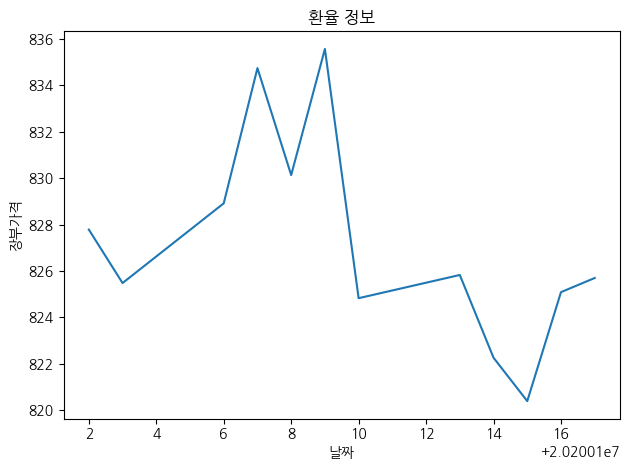

In [608]:
import matplotlib.pyplot as plt

# 날짜별로 그룹화하여 장부가격 평균 계산
grouped_data = total.groupby('날짜').mean()['장부가격']

# 그래프 그리기
plt.plot(grouped_data.index, grouped_data.values)
plt.xlabel('날짜')
plt.ylabel('장부가격')
plt.title('환율 정보')
plt.xticks()
plt.tight_layout()
plt.show()

# 방문 출입국 데이터

---



In [267]:
url = 'http://openapi.tour.go.kr/openapi/service/EdrcntTourismStatsService/getEdrcntTourismStatsList'
params ={'serviceKey' : 'wDgxSpyeA9jwerxCJQqqDo8e/Eo/SjyVd61fhoL4Of8WcbHz2uh+17caFnOc7hiqjrgP3RbRSDKiOTlMkIEQZw==', 
         'YM' : '202201', 
         'NAT_CD' : '', 
         'ED_CD' : 'E' 
         }

response = requests.get(url, params=params)
u_response = response.content.decode('utf-8')
content=response.text

In [268]:
xml_obj = bs4.BeautifulSoup(content,'lxml-xml')
rows = xml_obj.findAll('item')
print(rows)

[<item><ed>방한외래관광객</ed><edCd>E</edCd><natCd>105</natCd><natKorNm>방글라데시</natKorNm><num>720</num><rnum>1</rnum><ym>202201</ym></item>, <item><ed>방한외래관광객</ed><edCd>E</edCd><natCd>108</natCd><natKorNm>미얀마</natKorNm><num>5215</num><rnum>2</rnum><ym>202201</ym></item>, <item><ed>방한외래관광객</ed><edCd>E</edCd><natCd>111</natCd><natKorNm>스리랑카</natKorNm><num>751</num><rnum>3</rnum><ym>202201</ym></item>, <item><ed>방한외래관광객</ed><edCd>E</edCd><natCd>112</natCd><natKorNm>중  국</natKorNm><num>9489</num><rnum>4</rnum><ym>202201</ym></item>, <item><ed>방한외래관광객</ed><edCd>E</edCd><natCd>113</natCd><natKorNm>대  만</natKorNm><num>309</num><rnum>5</rnum><ym>202201</ym></item>, <item><ed>방한외래관광객</ed><edCd>E</edCd><natCd>120</natCd><natKorNm>홍  콩</natKorNm><num>76</num><rnum>6</rnum><ym>202201</ym></item>, <item><ed>방한외래관광객</ed><edCd>E</edCd><natCd>124</natCd><natKorNm>인  도</natKorNm><num>2871</num><rnum>7</rnum><ym>202201</ym></item>, <item><ed>방한외래관광객</ed><edCd>E</edCd><natCd>125</natCd><natKorNm>인도네시아</natKorNm>

In [269]:
# 각 행의 컬럼, 이름, 값을 가지는 리스트 만들기
row_list = [] # 행값
name_list = [] # 열이름값
value_list = [] #데이터값

# xml 안의 데이터 수집
for i in range(0, len(rows)):
    columns = rows[i].find_all()
    #첫째 행 데이터 수집
    for j in range(0,len(columns)):
        if i ==0:
            # 컬럼 이름 값 저장
            name_list.append(columns[j].name)
        # 컬럼의 각 데이터 값 저장
        value_list.append(columns[j].text)
    # 각 행의 value값 전체 저장
    row_list.append(value_list)
    # 데이터 리스트 값 초기화
    value_list=[]

In [270]:
visitor_df = pd.DataFrame(row_list, columns=name_list)
print(visitor_df)

        ed edCd natCd natKorNm   num rnum      ym
0  방한외래관광객    E   105    방글라데시   720    1  202201
1  방한외래관광객    E   108      미얀마  5215    2  202201
2  방한외래관광객    E   111     스리랑카   751    3  202201
3  방한외래관광객    E   112     중  국  9489    4  202201
4  방한외래관광객    E   113     대  만   309    5  202201
5  방한외래관광객    E   120     홍  콩    76    6  202201
6  방한외래관광객    E   124     인  도  2871    7  202201
7  방한외래관광객    E   125    인도네시아  4550    8  202201
8  방한외래관광객    E   126     이  란    61    9  202201
9  방한외래관광객    E   127      이라크    39   10  202201


In [271]:
visitor_df = pd.DataFrame(row_list, columns=name_list)
visitor_df.columns=['출입국 구분','출입국 구분코드','국가 코드','국가','출입국자수','결과 연번','연월']
visitor_df['국가'] = visitor_df['국가'].str.replace(' ','')
visitor_df

,출입국 구분,출입국 구분코드,국가 코드,국가,출입국자수,결과 연번,연월
0,방한외래관광객,E,105,방글라데시,720,1,202201
1,방한외래관광객,E,108,미얀마,5215,2,202201
2,방한외래관광객,E,111,스리랑카,751,3,202201
3,방한외래관광객,E,112,중국,9489,4,202201
4,방한외래관광객,E,113,대만,309,5,202201
5,방한외래관광객,E,120,홍콩,76,6,202201
6,방한외래관광객,E,124,인도,2871,7,202201
7,방한외래관광객,E,125,인도네시아,4550,8,202201
8,방한외래관광객,E,126,이란,61,9,202201
9,방한외래관광객,E,127,이라크,39,10,202201


In [272]:
visitor_df.to_csv("2020년 1월 방문객.csv",mode='w') 
visitor_r = pd.read_csv("2020년 1월 방문객.csv",index_col = 0)
df_v=pd.DataFrame(visitor_r)
df_v

,출입국 구분,출입국 구분코드,국가 코드,국가,출입국자수,결과 연번,연월
0,방한외래관광객,E,105,방글라데시,720,1,202201
1,방한외래관광객,E,108,미얀마,5215,2,202201
2,방한외래관광객,E,111,스리랑카,751,3,202201
3,방한외래관광객,E,112,중국,9489,4,202201
4,방한외래관광객,E,113,대만,309,5,202201
5,방한외래관광객,E,120,홍콩,76,6,202201
6,방한외래관광객,E,124,인도,2871,7,202201
7,방한외래관광객,E,125,인도네시아,4550,8,202201
8,방한외래관광객,E,126,이란,61,9,202201
9,방한외래관광객,E,127,이라크,39,10,202201


In [273]:
df_e.head(10)

,결과,통화 코드,송금 받으실때,송금 보낼때,매매기준율,장부가격,서울장부가격,서울매매기준율,국가,국가화폐
0,1,AED,312.54,318.85,315.7,315,315,315.7,아랍에미리트,디르함
1,1,AUD,791.83,807.82,799.83,799,799,799.83,호주,달러
2,1,BHD,"3,045.02","3,106.53","3,075.78","3,075","3,075","3,075.78",바레인,디나르
3,1,BND,852.3,869.51,860.91,860,860,860.91,브루나이,달러
4,1,CAD,880.13,897.92,889.03,889,889,889.03,캐나다,달러
5,1,CHF,"1,189.51","1,213.54","1,201.53","1,201","1,201","1,201.53",스위스,프랑
6,1,CNH,166.66,170.03,168.35,168,168,168.35,위안화,NaN
7,1,DKK,171.09,174.54,172.82,172,172,172.82,덴마아크,크로네
8,1,EUR,"1,278.47","1,304.3","1,291.39","1,291","1,291","1,291.39",유로,NaN
9,1,GBP,"1,501.41","1,531.74","1,516.58","1,516","1,516","1,516.58",영국,파운드


In [274]:
result = pd.merge(df_e,df_v,on='국가')
result


,결과,통화 코드,송금 받으실때,송금 보낼때,매매기준율,장부가격,서울장부가격,서울매매기준율,국가,국가화폐,출입국 구분,출입국 구분코드,국가 코드,출입국자수,결과 연번,연월
0,1,HKD,147.68,150.67,149.18,149,149,149.18,홍콩,달러,방한외래관광객,E,120,76,6,202201
1,1,IDR(100),8.42,8.59,8.51,8,8,8.51,인도네시아,루피아,방한외래관광객,E,125,4550,8,202201
